<a href="https://colab.research.google.com/github/AndreiKananovich/AI/blob/main/metal_surfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import random
from matplotlib.patches import Rectangle
from lxml import etree
%matplotlib inline

In [ ]:
import os
from google.colab import drive #подключаем библиотеку для работы с google диском
drive.mount('/content/drive') #монтируем google диск

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('/content/drive/My Drive/Базы/surface/images/images')

['punching_hole',
 'rolled_pit',
 'crescent_gap',
 'oil_spot',
 'inclusion',
 'crease',
 'welding_line',
 'silk_spot',
 'water_spot',
 'waist folding']

In [ ]:
os.listdir('/content/drive/My Drive/Базы/surface/label/label')[:5]

['img_03_4405356500_00897.xml',
 'img_08_4406743300_00378.xml',
 'img_07_4405376800_00039.xml',
 'img_03_425614600_00001.xml',
 'img_07_435974600_00212.xml']

In [ ]:
image_path = glob.glob('/content/drive/My Drive/Базы/surface/images/images/*/*.jpg')
len(image_path)

2306

In [ ]:
image_path[:10]

['/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_03_3403394000_01158.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_02_425502300_00018.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_02_425613600_00582.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_03_3403393700_00942.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_03_3403401700_00908.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_03_3403400200_00567.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_03_3403394100_01319.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_03_3403331900_01545.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_02_425637900_00899.jpg',
 '/content/drive/My Drive/Базы/surface/images/images/punching_hole/img_02_425640100_00874.jpg']

In [ ]:
xml_path = glob.glob('/content/drive/My Drive/Базы/surface/label/label/*')

In [ ]:
len(xml_path)
xml_path[:5]

['/content/drive/My Drive/Базы/surface/label/label/img_03_4405356500_00897.xml',
 '/content/drive/My Drive/Базы/surface/label/label/img_08_4406743300_00378.xml',
 '/content/drive/My Drive/Базы/surface/label/label/img_07_4405376800_00039.xml',
 '/content/drive/My Drive/Базы/surface/label/label/img_03_425614600_00001.xml',
 '/content/drive/My Drive/Базы/surface/label/label/img_07_435974600_00212.xml']

In [ ]:
# Sort the annotation and image files in ascending order

xml_path.sort(key = lambda x:x.split("/")[-1].split(".xml")[0])
image_path.sort(key = lambda x:x.split("/")[-1].split(".jpg")[0])

In [ ]:
xml_path_selected = [path.split('/')[-1].split('.')[0] for path in xml_path]
xml_path_selected[:5]


['img_01_3402617700_00001',
 'img_01_3402617700_01009',
 'img_01_3436789500_00004',
 'img_01_3436814600_00259',
 'img_01_3436815300_00473']

In [ ]:
image_train = [image for image in image_path if image.split('/')[-1].split('.jpg')[0] in xml_path_selected]
len(image_train)

2280

In [ ]:
labels = [label.split('/')[-2] for label in image_train]
labels[:5]

['crescent_gap', 'crescent_gap', 'crease', 'silk_spot', 'silk_spot']

In [ ]:
labels = pd.DataFrame(labels, columns = ["Defect Type"])
labels

,Defect Type
0,crescent_gap
1,crescent_gap
2,crease
3,silk_spot
4,silk_spot
...,...
2275,silk_spot
2276,silk_spot
2277,silk_spot
2278,silk_spot


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Obtain training labels without duplication
Class = labels["Defect Type"].unique()
# Store data values in key:value pairs with Python dictionaries
Class_dict = dict(zip(Class, range(1,len(Class) + 1)))
labels["Class"] = labels["Defect Type"].apply(lambda x: Class_dict[x])

lb = LabelBinarizer()
# Fit label binarizer
lb.fit(list(Class_dict.values()))
# Convert multi-class labels to binary labels (belong or does not belong to the class)
transformed_labels = lb.transform(labels["Class"])
y_bin_labels = []  

for i in range(transformed_labels.shape[1]):
    y_bin_labels.append("Class" + str(i))
    labels["Class" + str(i + 1)] = transformed_labels[:, i]

In [ ]:
Class_dict

{'crease': 2,
 'crescent_gap': 1,
 'inclusion': 6,
 'oil_spot': 7,
 'punching_hole': 10,
 'rolled_pit': 9,
 'silk_spot': 3,
 'waist folding': 8,
 'water_spot': 4,
 'welding_line': 5}

In [ ]:
labels.drop("Class", axis = 1, inplace = True)
labels.drop("Defect Type", axis = 1, inplace = True)
labels.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Function to parse and extract information from annotation files

def to_labels(path):
    # Read the annotation file
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    # Obtain the image width
    width = int(sel.xpath("//size/width/text()")[0])
    # Obtain the image height
    height = int(sel.xpath("//size/height/text()")[0])  
    # Extract the bounding box coordinates
    xmin = int(sel.xpath("//bndbox/xmin/text()")[0])
    xmax = int(sel.xpath("//bndbox/xmax/text()")[0])
    ymin = int(sel.xpath("//bndbox/ymin/text()")[0])
    ymax = int(sel.xpath("//bndbox/ymax/text()")[0])
    # Return the relative coordinates
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [ ]:
# Display the relative bounding box coordinates

coors = [to_labels(path) for path in xml_path]
coors[:5]

[[0.8486328125, 0.806, 0.951171875, 0.993],
 [0.857421875, 0.298, 0.96044921875, 0.858],
 [0.47900390625, 0.182, 0.9990234375, 0.249],
 [0.3642578125, 0.017, 0.49365234375, 0.993],
 [0.3974609375, 0.017, 0.7431640625, 0.978]]

In [ ]:
# Set four coordinate points as outputs

xmin, ymin, xmax, ymax = list(zip(*coors))

# Convert to Numpy array
xmin = np.array(xmin)
ymin = np.array(ymin)
xmax = np.array(xmax)
ymax = np.array(ymax)
label = np.array(labels.values)

In [ ]:
# Creates a Dataset whose elements are slices of the given tensors
# Slicing a 1D tensor produces scalar tensor elements

labels_dataset = tf.data.Dataset.from_tensor_slices((xmin, ymin, xmax, ymax, label))
labels_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None))>

In [ ]:
def load_image(path):
    image = tf.io.read_file(path)                           
    image = tf.image.decode_jpeg(image,3)               
    image = tf.image.resize(image,[224,224])               
    image = tf.cast(image,tf.float32)  
    image = image / 255
    return image

In [ ]:
# Build the dataset

dataset = tf.data.Dataset.from_tensor_slices(image_train)
dataset = dataset.map(load_image)

dataset_label = tf.data.Dataset.zip((dataset, labels_dataset))
dataset_label

<ZipDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None), TensorSpec(shape=(10,), dtype=tf.int64, name=None)))>

In [ ]:
# Shuffle the images and extract the images by the defined batch size

batch_size = 32
dataset_label = dataset_label.repeat().shuffle(500).batch(batch_size)

# Creates a Dataset that prefetches elements from this dataset
# Most dataset input pipelines should end with a call to prefetch
# This allows later elements to be prepared while the current element is being processed
# This often improves latency and throughput, at the cost of using additional memory to store prefetched elements

dataset_label = dataset_label.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# Split the dataset into 80% for training and 20% for testing

train_count = int(len(image_train) * 0.8)
test_count = int(len(image_train) * 0.2)
train_count, test_count

(1824, 456)

In [ ]:
train_dataset = dataset_label.skip(test_count)
test_dataset = dataset_label.take(test_count)

In [ ]:
class_dict = {v:k for k,v in Class_dict.items()}
class_dict

{1: 'crescent_gap',
 2: 'crease',
 3: 'silk_spot',
 4: 'water_spot',
 5: 'welding_line',
 6: 'inclusion',
 7: 'oil_spot',
 8: 'waist folding',
 9: 'rolled_pit',
 10: 'punching_hole'}

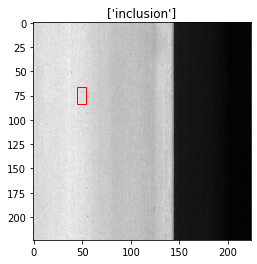

In [ ]:
# Display a sample training image with its label

for img, label in train_dataset.take(1):
    plt.imshow(keras.preprocessing.image.array_to_img(img[0]))     
    out1, out2, out3, out4, out5 = label                            
    xmin, ymin, xmax, ymax = out1[0].numpy()*224, out2[0].numpy()*224, out3[0].numpy()*224, out4[0].numpy()*224
    rect = Rectangle((xmin,ymin),(xmax - xmin),(ymax - ymin), fill = False, color = "r")  
    ax = plt.gca()                      
    ax.axes.add_patch(rect)   
    pred_imglist = []
    pred_imglist.append(class_dict[np.argmax(out5[0])+1])
    plt.title(pred_imglist)
    plt.show()

##VGG16

In [ ]:
base_vgg16 = tf.keras.applications.VGG16(weights = "imagenet",
                                         include_top = False,
                                         input_shape = (224,224,3),
                                         pooling = 'avg')

In [ ]:
base_vgg16.trainable = True

In [ ]:
inputs = keras.Input(shape = (224,224,3))
x = base_vgg16(inputs)

x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

x2 = keras.layers.Dense(1024,activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512,activation = "relu")(x2)
out_class = keras.layers.Dense(10,activation = "softmax", name = "class")(x2)

out = [out1, out2, out3, out4, out_class]

vgg16 = keras.models.Model(inputs = inputs, outputs = out)
vgg16.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 512)          14714688    ['input_2[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 1024)         525312      ['vgg16[0][0]']                  
                                                                                                  
 dense (Dense)                  (None, 1024)         525312      ['vgg16[0][0]']              

In [ ]:
# Compile the model with optimizer and loss functions

vgg16.compile(keras.optimizers.Adam(0.0005),
              loss = {"xmin": "mse",
                      "ymin": "mse",
                      "xmax": "mse",
                      "ymax": "mse",
                      "class": "categorical_crossentropy"},
              metrics = ["mae","acc"])

In [ ]:
# Reduce learning rate

lr_reduce = keras.callbacks.ReduceLROnPlateau("val_loss", patience = 5, factor = 0.5, min_lr = 1e-6)

In [ ]:
# Start training the model

history = vgg16.fit(train_dataset,
                    steps_per_epoch = train_count//batch_size,
                    epochs = 100,
                    validation_data = test_dataset,
                    validation_steps = test_count//batch_size,
                    callbacks = [lr_reduce])

Epoch 1/100
57/57 [==============================] - 156s 581ms/step - loss: 2.5010 - xmin_loss: 0.0986 - ymin_loss: 0.0787 - xmax_loss: 0.1222 - ymax_loss: 0.1153 - class_loss: 2.0862 - xmin_mae: 0.2625 - xmin_acc: 0.0000e+00 - ymin_mae: 0.2305 - ymin_acc: 0.0000e+00 - xmax_mae: 0.2747 - xmax_acc: 0.0789 - ymax_mae: 0.2804 - ymax_acc: 0.0680 - class_mae: 0.1680 - class_acc: 0.2802 - val_loss: 2.2565 - val_xmin_loss: 0.0758 - val_ymin_loss: 0.0853 - val_xmax_loss: 0.0922 - val_ymax_loss: 0.0883 - val_class_loss: 1.9149 - val_xmin_mae: 0.2284 - val_xmin_acc: 0.0000e+00 - val_ymin_mae: 0.2591 - val_ymin_acc: 0.0000e+00 - val_xmax_mae: 0.2624 - val_xmax_acc: 0.0960 - val_ymax_mae: 0.2701 - val_ymax_acc: 0.1205 - val_class_mae: 0.1647 - val_class_acc: 0.2500 - lr: 5.0000e-04
Epoch 2/100
57/57 [==============================] - 32s 558ms/step - loss: 2.4373 - xmin_loss: 0.0908 - ymin_loss: 0.0762 - xmax_loss: 0.0945 - ymax_loss: 0.0886 - class_loss: 2.0872 - xmin_mae: 0.2552 - xmin_acc: 0.0

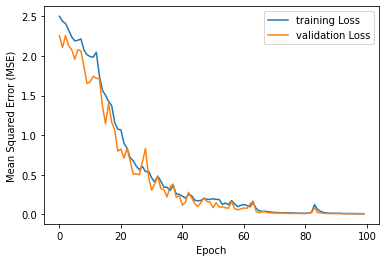

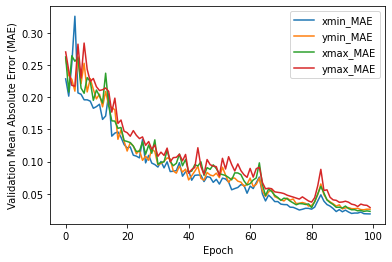

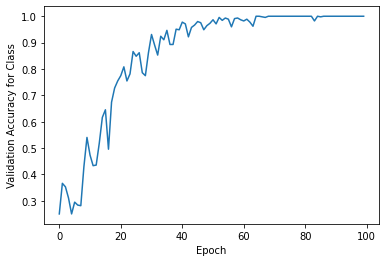

In [ ]:
# Visualize the results after training

def plot_history(history):                
    hist = pd.DataFrame(history.history)           
    hist["epoch"] = history.epoch
    
    plt.figure()                                     
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")               
    plt.plot(hist["epoch"], hist["loss"], label = "training Loss")
    plt.plot(hist["epoch"], hist["val_loss"], label = "validation Loss")                           
    plt.legend()
    
    plt.figure()                                      
    plt.xlabel("Epoch")
    plt.ylabel("Validation Mean Absolute Error (MAE)")               
    plt.plot(hist["epoch"], hist["val_xmin_mae"], label = "xmin_MAE")
    plt.plot(hist["epoch"], hist["val_ymin_mae"], label = "ymin_MAE")
    plt.plot(hist["epoch"], hist["val_xmax_mae"], label = "xmax_MAE")
    plt.plot(hist["epoch"], hist["val_ymax_mae"], label = "ymax_MAE")
    plt.legend()      
    
    plt.figure()                                      
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy for Class")               
    plt.plot(hist["epoch"],hist["val_class_acc"], label = "class_accuracy")
    
    plt.show()
    
plot_history(history)  

In [ ]:
results = vgg16.evaluate(test_dataset)

456/456 [==============================] - 122s 260ms/step - loss: 0.0067 - xmin_loss: 8.4848e-04 - ymin_loss: 0.0022 - xmax_loss: 0.0010 - ymax_loss: 0.0025 - class_loss: 9.9291e-05 - xmin_mae: 0.0191 - xmin_acc: 0.0000e+00 - ymin_mae: 0.0282 - ymin_acc: 0.0000e+00 - xmax_mae: 0.0216 - xmax_acc: 0.0919 - ymax_mae: 0.0289 - ymax_acc: 0.0780 - class_mae: 1.9828e-05 - class_acc: 1.0000


In [ ]:
print("MAE of xmin value in test set:{}".format(results[6]))
print("MAE of ymin value in test set:{}".format(results[8]))
print("MAE of xmax value in test set:{}".format(results[10]))
print("MAE of ymax value in test set:{}".format(results[12]))
print("Testing accuracy of predicted label:{}".format(results[15]))

MAE of xmin value in test set:0.01914963126182556
MAE of ymin value in test set:0.02823111228644848
MAE of xmax value in test set:0.021624324843287468
MAE of ymax value in test set:0.028872860595583916
Testing accuracy of predicted label:1.0


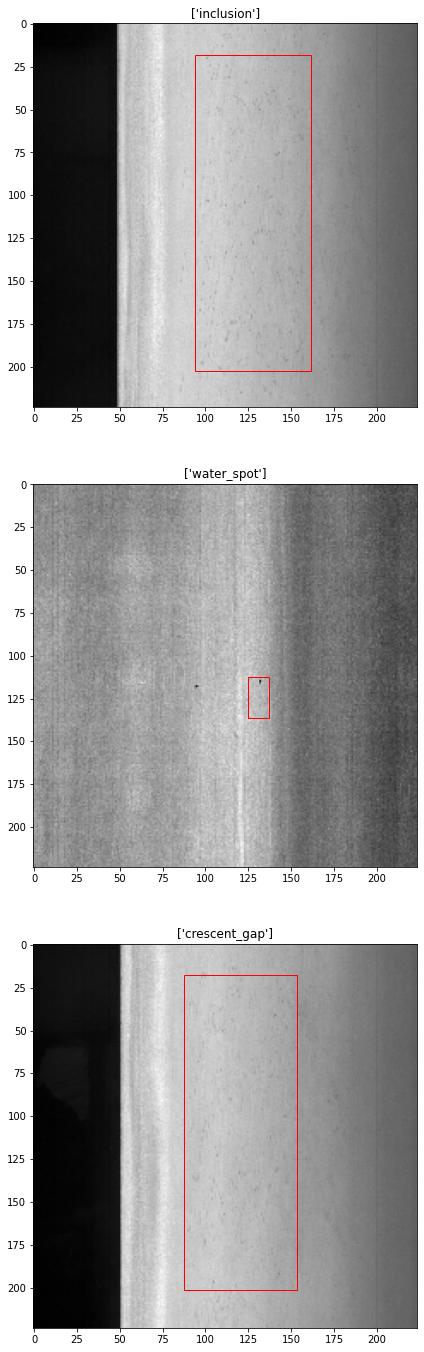

In [ ]:
plt.figure(figsize = (10, 24))
for img, _ in test_dataset.take(1):
    out1, out2, out3, out4, label = vgg16.predict(img)
    for i in range(3):
        plt.subplot(3, 1, i + 1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(class_dict[np.argmax(out5[i]) + 1])
        plt.title(pred_imglist)
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin,ymin), (xmax - xmin), (ymax - ymin), fill = False, color = "r") 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)

In [ ]:
# Append all the true labels into a list

true_labels = []

for _, label in test_dataset:    
    out1, out2, out3, out4, out5 = label                              
    true_labels.append(class_dict[np.argmax(out5) + 1])

In [ ]:
true_labels

['water_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'inclusion',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'crescent_gap',
 'crease',
 'silk_spot',
 'punching_hole',
 'welding_line',
 'inclusion',
 'oil_spot',
 'punching_hole',
 'water_spot',
 'punching_hole',
 'crease',
 'silk_spot',
 'crease',
 'silk_spot',
 'punching_hole',
 'welding_line',
 'crescent_gap',
 'water_spot',
 'crescent_gap',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'crescent_gap',
 'silk_spot',
 'punching_hole',
 'crescent_gap',
 'waist folding',
 'oil_spot',
 'waist folding',
 'silk_spot',
 'water_spot',
 'crescent_gap',
 'crescent_gap',
 'silk_spot',
 'water_spot',
 'welding_line',
 'waist folding',
 'inclusion',
 'silk_spot',
 'oil_spot',
 'silk_spot',
 'waist folding',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'inclusion',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'water_spot',
 'inclusion',
 'waist folding',
 'inclusion'

In [ ]:
test_labels = []

for img, label in test_dataset:
    out1, out2, out3, out4, out5 = label
    label = vgg16.predict(img)
    test_labels.append(class_dict[np.argmax(out5) + 1])

In [ ]:
test_labels

['silk_spot',
 'water_spot',
 'silk_spot',
 'water_spot',
 'waist folding',
 'silk_spot',
 'oil_spot',
 'water_spot',
 'inclusion',
 'welding_line',
 'water_spot',
 'punching_hole',
 'welding_line',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'crescent_gap',
 'inclusion',
 'water_spot',
 'water_spot',
 'water_spot',
 'welding_line',
 'inclusion',
 'water_spot',
 'welding_line',
 'welding_line',
 'oil_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'water_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'oil_spot',
 'silk_spot',
 'crescent_gap',
 'oil_spot',
 'silk_spot',
 'inclusion',
 'waist folding',
 'silk_spot',
 'punching_hole',
 'oil_spot',
 'silk_spot',
 'punching_hole',
 'silk_spot',
 'crease',
 'silk_spot',
 'silk_spot',
 'crease',
 'waist folding',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'crescent_gap',
 'oil_spot',
 'waist folding',
 'silk_spot',
 'silk_spot',
 'welding_line',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'inclusion',
 'crescent_gap',
 'water_